# Exercícios de Visualização de Informação - P1

Risco de incêndio

O risco de acontecer um incêndio pode ser calculado considerando como parâmetros, a temperatura e a humidade do ar. O risco de incêndio aumenta quanto maior for a temperatura e menor o nível de humidade. Quando o risco de incêndio é elevado, a população é informada através de avisos de alerta.

Programe a função risco que a partir de uma sequência de registos indica quais os dias em que existiu risco de incêndio. O risco de incêncio acontece quando a temperatura é superior a 
30
30
 e a humidade inferior a 
60
60
. O dia pode ser identificado, sabendo que o primeiro registo corresponde ao dia 2019-01-01.

Por exemplo, dada uma sequência de registos, contendo cada registo, o número da observação, a temperatura e a humidade:

In [1]:
data = [
    [1,28,89],
    [2,27,94],
    [3,25,96],
    [4,30,100],
    [5,31,98],
    [6,29,81],
    [7,29,60],
    [8,31,73],
    [9,26,88],
    [10,27,85],
    [11,27,88],
    [12,33,89],
    [13,34,80],
    [14,28,100],
    [15,28,97],
    [16,27,95],
    [17,31,96],
    [18,29,96],
    [19,27,88],
    [20,33,70],
    [21,35,68],
    [22,33,56],
    [23,30,96],
    [24,34,96],
    [25,36,96]
]

In [2]:
data

[[1, 28, 89],
 [2, 27, 94],
 [3, 25, 96],
 [4, 30, 100],
 [5, 31, 98],
 [6, 29, 81],
 [7, 29, 60],
 [8, 31, 73],
 [9, 26, 88],
 [10, 27, 85],
 [11, 27, 88],
 [12, 33, 89],
 [13, 34, 80],
 [14, 28, 100],
 [15, 28, 97],
 [16, 27, 95],
 [17, 31, 96],
 [18, 29, 96],
 [19, 27, 88],
 [20, 33, 70],
 [21, 35, 68],
 [22, 33, 56],
 [23, 30, 96],
 [24, 34, 96],
 [25, 36, 96]]

In [18]:
import pandas as pd

In [30]:
datas = pd.date_range(start ='1-1-2019', periods = len(data), freq='D')
dataframe = pd.DataFrame(data)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25'],
              dtype='datetime64[ns]', freq='D')

In [38]:
dataframe['datas'] = datas
del dataframe[dataframe.columns[0]]

In [39]:
dataframe = dataframe.set_index('datas') 

In [123]:
dataframe.head(10)

,temperatura,umidade
datas,,
2019-01-01,28,89
2019-01-02,27,94
2019-01-03,25,96
2019-01-04,30,100
2019-01-05,31,98
2019-01-06,29,81
2019-01-07,29,60
2019-01-08,31,73
2019-01-09,26,88


In [74]:
dataframe.columns = ['temperatura', 'umidade']

In [80]:
dataframe[(dataframe['temperatura'] > 30 ) & (dataframe['umidade'] < 60 )] 

,temperatura,umidade
datas,,
2019-01-22,33,56


In [99]:
import matplotlib.pyplot as plt

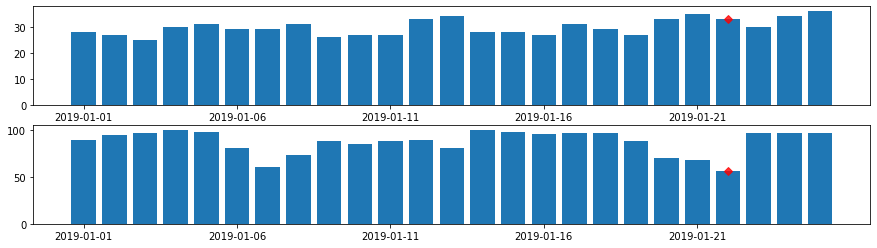

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))

POSITION_DOT = 21

plt.subplot(2, 1, 1)
plt.bar(dataframe.index.values, dataframe['temperatura'])
plt.plot(dataframe.index.values[POSITION_DOT], dataframe['temperatura'][POSITION_DOT], marker="D", linestyle="", alpha=0.8, color="r")
plt.xticks(dataframe.index[::5])


plt.subplot(2, 1, 2)
plt.bar(dataframe.index.values, dataframe['umidade'])
plt.plot(dataframe.index.values[POSITION_DOT], dataframe['umidade'][POSITION_DOT], marker="D", linestyle="", alpha=0.8, color="r")
plt.xticks(dataframe.index[::5])



plt.show()

### População
A economia de um país pode ser caracterizada pelo número de habitantes e pelo salário médio desses habitantes. Mas será que estas duas variáveis estão linearmente relacionadas? Para analisar sobre a relação das duas variáveis é necessário encontrar os parâmetros da reta, 
m
m
 e 
b
b
, tal que y=mx+b.

Para a estimação dos parâmetros da reta considere a função np.polyfit e para cálculo dos valores da reta, a função np.polyval.

Por exemplo, dada a sequências de registos com a população e o salário:

In [159]:
data = [
    [6.1101,17.592],
    [5.5277,9.1302],
    [8.5186,13.662],
    [7.0032,11.854],
    [5.8598,6.8233],
    [8.3829,11.886],
    [7.4764,4.3483],
    [8.5781,12],
    [6.4862,6.5987],
    [5.0546,3.8166],
    [5.7107,3.2522],
    [14.164,15.505],
    [5.734,3.1551],
    [8.4084,7.2258],
    [5.6407,0.71618],
    [5.3794,3.5129],
    [6.3654,5.3048],
    [5.1301,0.56077],
    [6.4296,3.6518],
    [7.0708,5.3893],
    [6.1891,3.1386],
    [20.27,21.767],
    [5.4901,4.263],
    [6.3261,5.1875],
    [5.5649,3.0825]
]

In [160]:
import numpy as np

In [162]:
dataframe = pd.DataFrame(data)
dataframe.columns = ['x', 'y']
dataframe.head(10)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [180]:
m, b = np.polyfit(dataframe.x, dataframe.y, 1)
print(f'{m} e {b}')

1.2520780912761402 e -1.821803896877995


In [181]:
poly_with_value = np.poly1d([m, b]) 
print(f'{poly_with_value}')

 
1.252 x - 1.822


In [182]:
np.polyval([m], np.poly1d(b))

poly1d([1.25207809])

Text(0, 0.5, 'Salário')

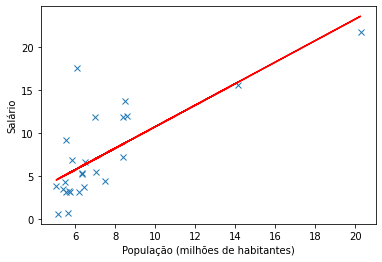

In [190]:
plt.plot(dataframe.x, dataframe.y, 'x')
plt.plot(dataframe.x, m*dataframe.x + b, 'r-')
plt.xlabel('População (milhões de habitantes)')
plt.ylabel('Salário')

### Centróides
Três pontos, designados centróides, estão localizados nas seguintes posições: [5.0, 0.0],[45.0, 70.0],[50.0, 90.0]. Os centróides podem ser identificados por: 0,1,2.

A partir de uma lista desorganizada de pontos, pretende-se classificar cada ponto no centróide respetivo, sendo escolhido o centróide mais próximo do ponto em análise.

Por exemplo, dada uma sequência de pontos com coordenadas x,y:

In [226]:
centroides = np.array([[5.0, 0.0], [45.0, 70.0], [50.0, 90.0]])
pontos = np.array([[15,16],
    [16,18.5],
    [17,20.2],
    [16.4,17.12],
    [17.23,18.12],
    [43,43],
    [44.43,45.212],
    [45.8,54.23],
    [46.313,43.123],
    [50.21,46.3],
    [99,99.22],
    [100.32,98.123],
    [100.32,97.423],
    [102,93.23],
    [102.23,94.23]])

In [227]:
classificacao = []
for item in pontos:
    resultados = []
    for elemento in centroides:
        resultados.append(np.linalg.norm(elemento - item))
    classificacao.append(resultados.index(min(resultados)))
classificacao

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [230]:
data = [
    [15,16],
    [16,18.5],
    [17,20.2],
    [16.4,17.12],
    [17.23,18.12],
    [43,43],
    [44.43,45.212],
    [45.8,54.23],
    [46.313,43.123],
    [50.21,46.3],
    [99,99.22],
    [100.32,98.123],
    [100.32,97.423],
    [102,93.23],
    [102.23,94.23]
]
dataframe = pd.DataFrame(data)
dataframe.columns = ['x', 'y']
dataframe['key1'] = classificacao
dataframe.head(10)

,x,y,key1
0,15.000,16.000,0
1,16.000,18.500,0
2,17.000,20.200,0
3,16.400,17.120,0
4,17.230,18.120,0
5,43.000,43.000,1
6,44.430,45.212,1
7,45.800,54.230,1
8,46.313,43.123,1
9,50.210,46.300,1


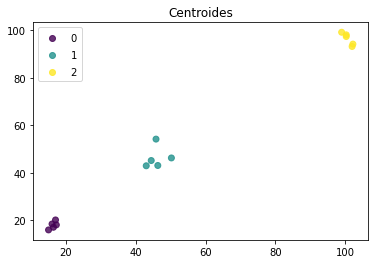

In [231]:
fig, ax = plt.subplots()
sc = ax.scatter(dataframe.x, dataframe.y, marker = 'o', c = dataframe['key1'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.title('Centroides')
plt.show()